# Imports

In [2]:
%matplotlib inline

import numpy as np
import model_flux_ratio as mfr
import scipy.interpolate as interp
from astropy.table import Table
from matplotlib import pyplot as plt
from functools import reduce
import astropy.constants as const
import astropy.units as u

In [3]:
import importlib

import model_flux_ratio as mfr

importlib.reload(mfr)

<module 'model_flux_ratio' from '/Users/thsyu/Software/Yp/model_flux_ratio.py'>

# Hydrogen C/R

## Define hydrogen waves, read in AOS2010's C/R values, define test xi and temperature grid

In [19]:
hydrogen_lines = np.array([10941.082, 6564.612, 4862.721, 4341.684, 4102.891, 3890.166, 18756.096, 40522.79, 12821.578]) #last 3 are Pa, Br-a, Pb
hydrogen_CR_coeff = Table.read('/Users/thsyu/Software/Yp/tables/hydrogen_CR_coeff', format='ascii', delimiter='\t')

test_temp = np.linspace(1.0e4, 2.5e4, 100)
test_xi = 1e-4

### Calculate AOS2010 C/R at test xi, temperatures

In [20]:
ha = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[1], test_temp)
hb = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[2], test_temp)
hg = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[3], test_temp)
hd = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[4], test_temp)
pg = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[0], test_temp)

### Calculate our C/R at test xi, temperature

In [21]:
CR_A2002_Ha = np.zeros(test_temp.size)
CR_A2002_Hb = np.zeros(test_temp.size)
CR_A2002_Hg = np.zeros(test_temp.size)
CR_A2002_Hd = np.zeros(test_temp.size)
CR_A2002_H8 = np.zeros(test_temp.size)
CR_A2002_Pg = np.zeros(test_temp.size)

for t in range(test_temp.size):
    CR_A2002_Ha[t] = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[1], test_temp[t], method='A2002')
    CR_A2002_Hb[t] = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[2], test_temp[t], method='A2002')
    CR_A2002_Hg[t] = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[3], test_temp[t], method='A2002')    
    CR_A2002_Hd[t] = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[4], test_temp[t], method='A2002')
    CR_A2002_H8[t] = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[5], test_temp[t], method='A2002')
    CR_A2002_Pg[t] = mfr.hydrogen_collision_to_recomb(test_xi, hydrogen_lines[0], test_temp[t], method='A2002')

### Test scaling from known C/R curves

In [22]:
kB = 8.61733e-5
Ha_to_Hb = np.exp((-13.6 * ((1 / 3 ** 2) - (1 / 4 ** 2))) / (kB * test_temp))
Hb_to_Hg = np.exp((-13.6 * ((1 / 4 ** 2) - (1 / 5 ** 2))) / (kB * test_temp))
Hg_to_Hd = np.exp((-13.6 * ((1 / 5 ** 2) - (1 / 6 ** 2))) / (kB * test_temp))

## Plot

### C/R: Erik vs Ours

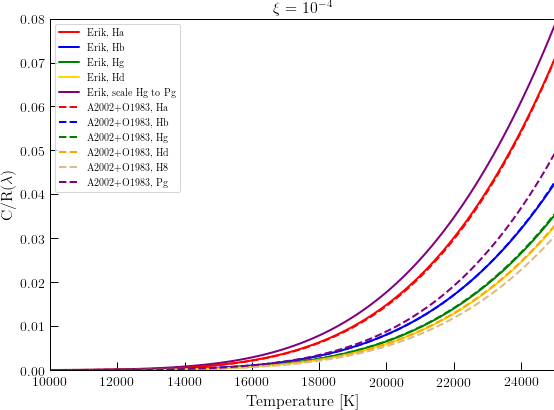

In [23]:
plt.subplots(figsize=(8,6))
plt.plot(test_temp, ha, color='red', label='Erik, Ha')
plt.plot(test_temp, hb, color='blue', label='Erik, Hb')
plt.plot(test_temp, hg, color='green', label='Erik, Hg')
plt.plot(test_temp, hd, color='gold', label='Erik, Hd')
plt.plot(test_temp, pg, color='purple', label='Erik, scale Hg to Pg')
plt.plot(test_temp, CR_A2002_Ha, color='red', ls='--', label='A2002+O1983, Ha')
plt.plot(test_temp, CR_A2002_Hb, color='blue', ls='--', label='A2002+O1983, Hb')
plt.plot(test_temp, CR_A2002_Hg, color='green', ls='--', label='A2002+O1983, Hg')
plt.plot(test_temp, CR_A2002_Hd, color='orange', ls='--', label='A2002+O1983, Hd')
plt.plot(test_temp, CR_A2002_H8, color='burlywood', ls='--', label='A2002+O1983, H8')
plt.plot(test_temp, CR_A2002_Pg, color='purple', ls='--', label='A2002+O1983, Pg')
plt.legend()
plt.xlabel('Temperature [K]')
plt.ylabel(r'C/R($\lambda$)')
plt.title(r'$\xi=10^{-4}$')
plt.ylim(0.0, 0.08)
plt.savefig('/Users/thsyu/Desktop/CR_xi1e-4.pdf')
plt.show()

### C/R: scalings between known C/R curves

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


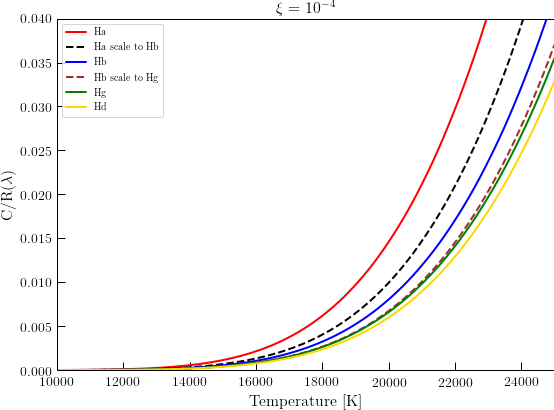

In [24]:
plt.subplots(figsize=(8,6))
plt.plot(test_temp, CR_A2002_Ha, color='red', label='Ha')
plt.plot(test_temp, CR_A2002_Ha*Ha_to_Hb, color='black', ls='--', label='Ha scale to Hb')
plt.plot(test_temp, CR_A2002_Hb, color='blue', label='Hb')
plt.plot(test_temp, CR_A2002_Hb*Hb_to_Hg, color='brown', ls='--', label='Hb scale to Hg')
plt.plot(test_temp, CR_A2002_Hg, color='green',  label='Hg')
plt.plot(test_temp, CR_A2002_Hd, color='gold', label='Hd')
plt.legend()
plt.xlabel('Temperature [K]')
plt.ylabel(r'C/R($\lambda$)')
plt.title(r'$\xi=10^{-4}$')
plt.ylim(0.0, 0.04)
plt.savefig('/Users/thsyu/Desktop/CR_scaling.pdf')
plt.show()